<a href="https://colab.research.google.com/github/taniasuchi07/Technical-Assessment/blob/main/QMH01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
%pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.9 MB/s eta 0:00:00


In [ ]:
from docx import Document
import pandas as pd, matplotlib.pyplot as plt, os, re
from collections import Counter

matrix_path = "/content/drive/MyDrive/Colab Notebooks/Literature Matrix_LLMs for Low-Resource Languages .docx"
out_dir = "/content/drive/MyDrive/Colab Notebooks/figures_from_matrix"
os.makedirs(out_dir, exist_ok=True)

# Load first big table
doc = Document(matrix_path)
table = [t for t in doc.tables if len(t.rows) > 1][0]

cols = ["No.","Author, Year","Title","Journal Name","Research Objectives","Research Questions",
        "Problems / Issues","Theories / Models","Variables","Hypothesis Development","Country",
        "Items / Scale (Source)","Respondents","Data Collection Process","Statistical Technique",
        "Findings","Conclusion","Limitations & Future Directions"]

rows=[]
for r in table.rows[1:]:
    c=[x.text.strip() for x in r.cells]
    c=(c+[""]*len(cols))[:len(cols)]
    rows.append(c)
df=pd.DataFrame(rows,columns=cols)
df["year"]=df["Author, Year"].str.extract(r"((?:19|20)\d{2})").astype(float)


,No.,"Author, Year",Title,Journal Name,Research Objectives,Research Questions,Problems / Issues,Theories / Models,Variables,Hypothesis Development,Country,Items / Scale (Source),Respondents,Data Collection Process,Statistical Technique,Findings,Conclusion,Limitations & Future Directions,year
0,1,"Adelani et al., 2024a",IrokoBench: A new benchmark for African langua...,Conference of the Nations of the Americas Chap...,To introduce a new benchmark for evaluating LL...,How do LLMs perform on African LRLs?,Lack of evaluation data for African LRLs,"Benchmarking, Transfer Learning",LLM performance metrics,None stated explicitly,Africa,Custom benchmark datasets,Open-source LLMs,"Dataset creation, model evaluation","Evaluation metrics, comparative scores",LLMs underperform on African languages,Highlights representational gaps,"Limited to evaluation, not training-focused",2024.0
1,2,"Darģis et al., 2024",Evaluating open-source LLMs in low-resource la...,NLP4DH,To test LLM performance on Latvian high school...,How accurate are LLMs on complex LRL exams?,Few real-world evaluation tasks for LRLs,Task-based performance evaluation,"Accuracy, recall, BLEU",No hypothesis stated,Latvia,Latvian exam items,Model outputs on test prompts,Text-based QA tasks,"Manual grading, accuracy %",LLMs showed moderate success,Valid for educational settings,Limited generalizability outside Latvian,2024.0
2,3,"Le et al., 2025",The impact of LoRA adapters for LLMs on clinic...,arXiv,To evaluate LoRA for clinical NLP under low-re...,Can LoRA improve clinical text classification?,Low data volume in clinical domain,LoRA (Low-Rank Adaptation),"Model performance, adapter layers",Not formalized,Canada,Clinical datasets,NLP models with LoRA,Training/evaluation split,"F1 score, loss",LoRA improves domain adaptation,Efficient for clinical LRLs,"Focused on classification, not generation",2025.0
3,4,"Hu et al., 2024",Language fusion via adapters,Speech Communication,To improve speech recognition for LRLs via ada...,How effective is fusion of multilingual data?,Sparse LRL audio training data,Adapter Fusion Model,"WER, accuracy",None stated,China,Speech audio corpora,LRL speech inputs,Model training & evaluation,"WER reduction, ASR accuracy",Adapter fusion helps improve LRL ASR,Promising for speech LLMs,Needs broader language coverage,2024.0
4,5,"Myung et al., 2024",BLEnD benchmark,arXiv,To provide a benchmark on culturally diverse e...,Do LLMs retain commonsense across languages?,Cultural bias in LLMs,Commonsense reasoning,"Accuracy, cultural context",Implied only,Multi-country,"Benchmark tasks (QA, summarization)",Multilingual LLMs,Cross-lingual evaluation,"Accuracy, consistency",LLMs fail to align across cultures,Cross-lingual gaps exist,Limited to evaluation tasks only,2024.0


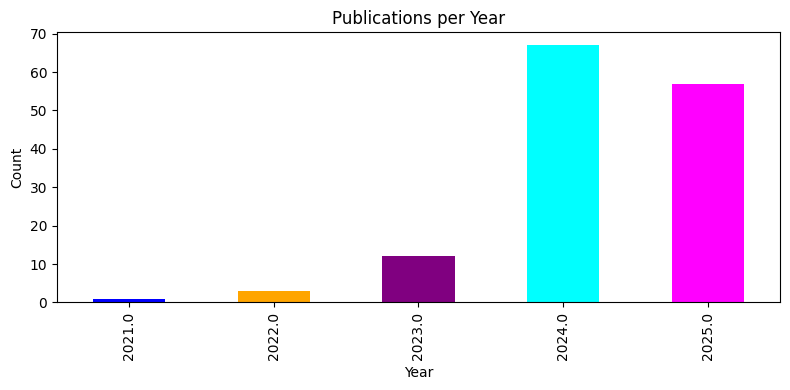

In [ ]:
import matplotlib.pyplot as plt

# Define a list of colors
colors = ['blue', 'orange', 'purple', 'cyan', 'magenta']
plt.figure(figsize=(8,4))
df["year"].value_counts().sort_index().plot.bar(color=colors[:len(df["year"].unique())])
plt.title("Publications per Year");plt.xlabel("Year");plt.ylabel("Count")
plt.tight_layout();plt.savefig(f"{out_dir}/fig1_publications_per_year.png",dpi=300)
plt.show()

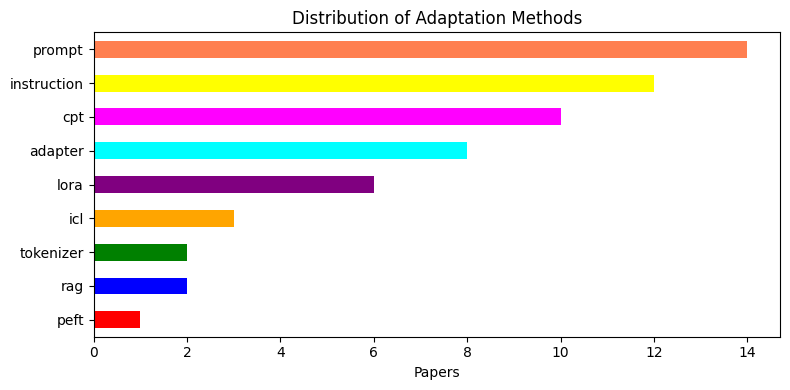

In [ ]:
import matplotlib.pyplot as plt

kw = ["lora", "peft", "adapter", "instruction", "prompt", "icl", "rag", "cpt", "tokenizer"]
s = (df["Theories / Models"] + " " + df["Findings"]).str.lower()
counts = {k: s.str.contains(k).sum() for k in kw if s.str.contains(k).sum() > 0}

# Define a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'coral']

plt.figure(figsize=(8, 4))
pd.Series(counts).sort_values().plot.barh(color=colors[:len(counts)])
plt.title("Distribution of Adaptation Methods")
plt.xlabel("Papers")
plt.tight_layout()
plt.savefig(f"{out_dir}/fig2_adaptation_methods.png", dpi=300)
plt.show()

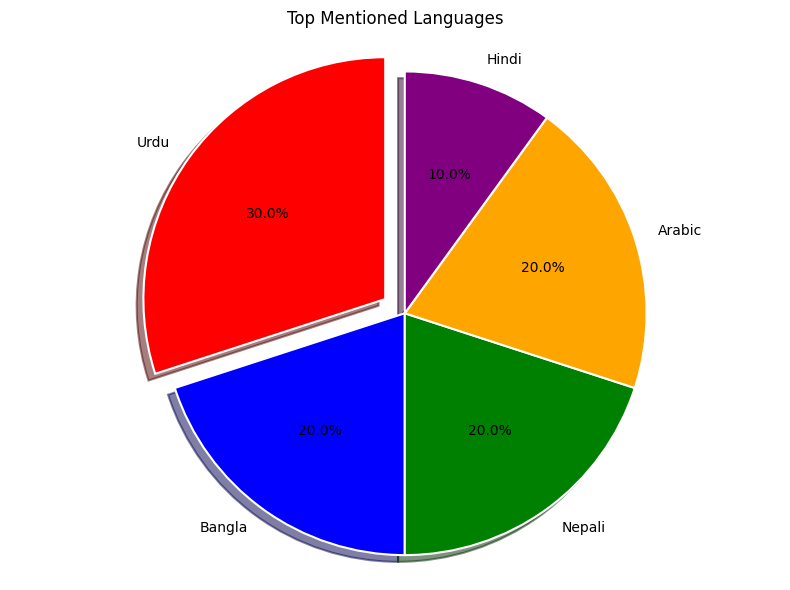

In [ ]:
import matplotlib.pyplot as plt

# List of languages
langs = ["Bangla", "Hindi", "Urdu",   "Nepali", "Arabic"]
# Count occurrences of each language
cnt = {l: (df["Title"] + df["Research Objectives"]).str.contains(l, case=False).sum() for l in langs}

# Select the top 10 mentioned languages
top_langs = pd.Series(cnt).sort_values(ascending=False).head(10)

# Define a list of colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'coral', 'teal']
explode = (0.1, 0, 0, 0, 0)
# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_langs, labels=top_langs.index, shadow=True, explode = explode, autopct='%1.1f%%', startangle=90, colors=colors[:len(top_langs)],
       wedgeprops = {"linewidth": 1.5, "edgecolor": "white"})
plt.title("Top Mentioned Languages")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.savefig(f"{out_dir}/fig3_languages.png", dpi=300)
plt.show()

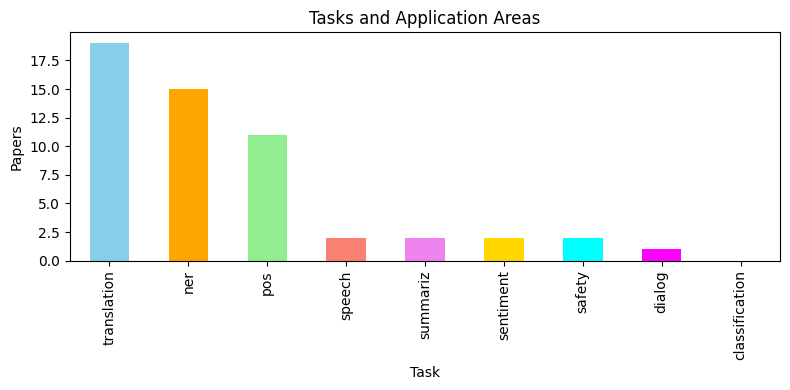

In [ ]:
import matplotlib.pyplot as plt

# List of tasks
tasks = ["translation", "speech", "ner", "pos", "summariz", "sentiment", "dialog", "safety", "classification"]

# Combine text from two columns and convert to lowercase
txt = (df["Research Objectives"] + " " + df["Title"]).str.lower()

# Count occurrences of each task
counts = {t: txt.str.contains(t).sum() for t in tasks}

# Define a list of colors (one for each task)
colors = ['skyblue', 'orange', 'lightgreen', 'salmon', 'violet', 'gold', 'cyan', 'magenta', 'lime']

# Plot bar chart with different colors
plt.figure(figsize=(8, 4))
pd.Series(counts).sort_values(ascending=False).plot.bar(color=colors[:len(counts)])
plt.title("Tasks and Application Areas")
plt.xlabel("Task")
plt.ylabel("Papers")
plt.tight_layout()
plt.savefig(f"{out_dir}/fig4_tasks.png", dpi=300)
plt.show()

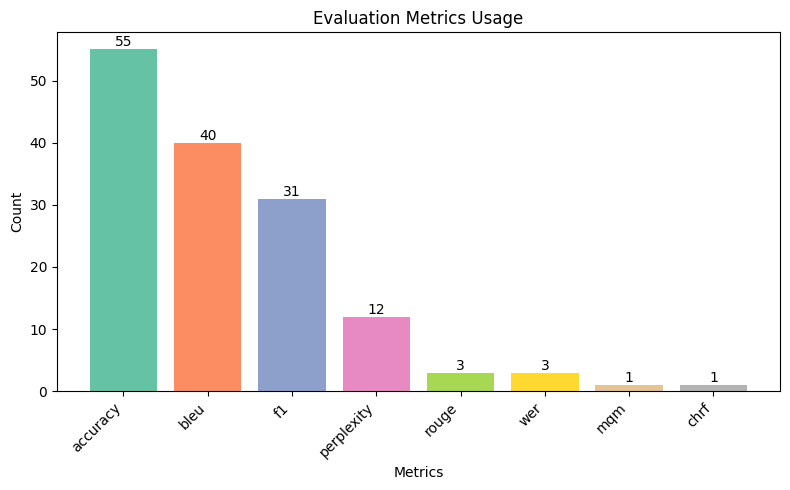

In [ ]:
import matplotlib.pyplot as plt

metrics = ["bleu", "f1", "rouge", "perplexity", "wer", "accuracy", "mqm", "chrf"]
s = (df["Statistical Technique"] + " " + df["Findings"]).str.lower()
cnt = {m: s.str.contains(m).sum() for m in metrics if s.str.contains(m).sum() > 0}

counts_series = pd.Series(cnt).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
bars = plt.bar(counts_series.index, counts_series.values, color=plt.cm.Set2(range(len(counts_series))))

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height, f'{int(height)}',
             ha='center', va='bottom', fontsize=10)

plt.title("Evaluation Metrics Usage", fontsize=12)
plt.xlabel("Metrics")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')  # Rotate x-labels for readability
plt.tight_layout()
plt.savefig(f"{out_dir}/fig5_metrics.png", dpi=300)
plt.show()

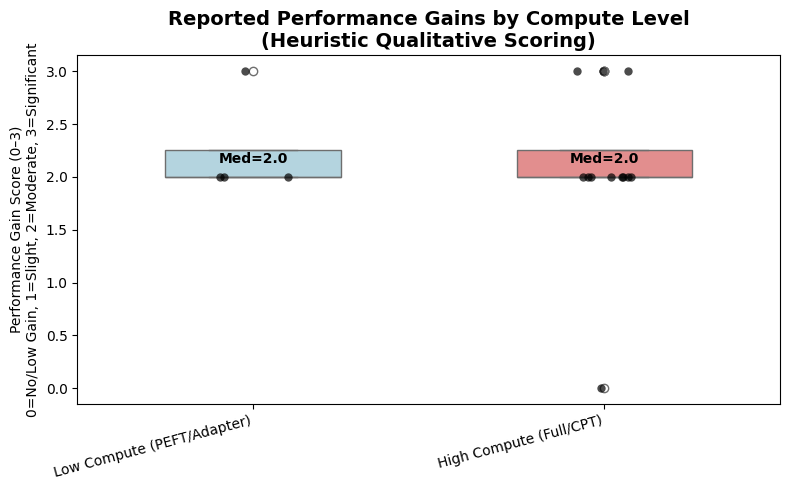

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Preprocessing: Compute Proxy ---
def proxy(s):
    s = str(s).lower()  # Ensure string type and lowercase
    if any(k in s for k in ["lora", "adapter", "peft"]):
        return "Low Compute (PEFT/Adapter)"
    elif any(k in s for k in ["pretrain", "finetun", "full fine", "cpt"]):
        return "High Compute (Full/CPT)"
    else:
        return None  # Explicitly handle cases where no match is found

df["compute"] = df["Theories / Models"].fillna("").apply(proxy)

# --- Preprocessing: Gain Proxy ---
def gain_proxy(s):
    s = str(s).lower()  # Ensure string type and lowercase
    if any(k in s for k in ["significant", "high", "large", "strongly", "substantial"]):
        return 3  # Significant gain
    elif any(k in s for k in ["improve", "better", "outperform", "increase", "higher"]):
        return 2  # Moderate gain
    elif any(k in s for k in ["slight", "marginal", "minor", "small"]):
        return 1  # Slight gain
    elif any(k in s for k in ["no", "not", "little", "less", "none", "failed"]):
        return 0  # No gain
    else:
        return np.nan  # Handle cases where no match is found

df["gain"] = df["Findings"].apply(gain_proxy)

# --- Filter Data ---
d = df.dropna(subset=["compute", "gain"])  # Drop rows with missing compute or gain values

# --- Visualization: Box Plot ---
plt.figure(figsize=(8, 5))

if not d.empty:
    # Use seaborn for clean box plot
    sns.boxplot(data=d, x="compute", y="gain", palette=["lightblue", "lightcoral"], width=0.5)

    # Add jittered points for individual observations
    sns.stripplot(data=d, x="compute", y="gain", color="black", alpha=0.7, size=6, jitter=True)

    # Title and Labels
    plt.title("Reported Performance Gains by Compute Level\n(Heuristic Qualitative Scoring)", fontsize=14, fontweight='bold')
    plt.ylabel("Performance Gain Score (0–3)\n0=No/Low Gain, 1=Slight, 2=Moderate, 3=Significant")
    plt.xlabel("")
    plt.xticks(rotation=15, ha='right')

    # Add median values on top of the boxes
    for i, group in enumerate(d.groupby("compute")):
        med = group[1]["gain"].median()
        plt.text(i, med + 0.1, f"Med={med:.1f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

else:
    plt.text(0.2, 0.5, "No qualifying entries detected", fontsize=12, ha='center')

plt.tight_layout()
plt.savefig(f"{out_dir}/fig6_peft_boxplot.png", dpi=300)
plt.show()

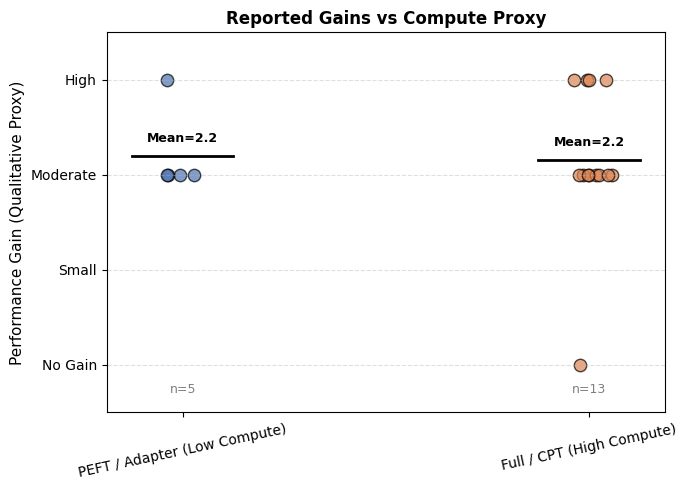

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# keep existing columns: df['compute'] and df['gain']
d = df.dropna(subset=["compute","gain"]).copy()
if d.empty:
    print("No data available for plotting.")
else:
    plt.figure(figsize=(7,5))
    groups = ["low","high"]
    x_pos = [1,3]
    colors = {"low":"#4C72B0","high":"#DD8452"}

    # Plot distribution per group with jitter
    for g,x in zip(groups,x_pos):
        vals = d.loc[d["compute"]==g,"gain"]
        if len(vals)==0: continue
        jitter = np.random.uniform(-0.12,0.12,len(vals))
        plt.scatter(np.full(len(vals),x)+jitter, vals,
                    color=colors[g], alpha=0.7, edgecolor="k", s=80, label=g.upper())
        # Mean line
        mean = vals.mean()
        plt.plot([x-0.25,x+0.25],[mean,mean],color="black",lw=2)
        plt.text(x, mean+0.15, f"Mean={mean:.1f}", ha="center", fontsize=9, fontweight="bold")
        # Count
        plt.text(x, -0.3, f"n={len(vals)}", ha="center", fontsize=9, color="gray")

    # Aesthetics
    plt.xticks(x_pos, ["PEFT / Adapter (Low Compute)","Full / CPT (High Compute)"], rotation=12)
    plt.yticks([0,1,2,3], ["No Gain","Small","Moderate","High"])
    plt.ylabel("Performance Gain (Qualitative Proxy)", fontsize=11)
    plt.title("Reported Gains vs Compute Proxy", fontsize=12, weight="bold")
    plt.grid(axis="y", linestyle="--", alpha=0.4)
    plt.ylim(-0.5,3.5)
    plt.legend().set_visible(False)
    plt.tight_layout()
    plt.savefig(f"{out_dir}/fig6_peft_scatter_enhanced.png", dpi=400)
    plt.show()


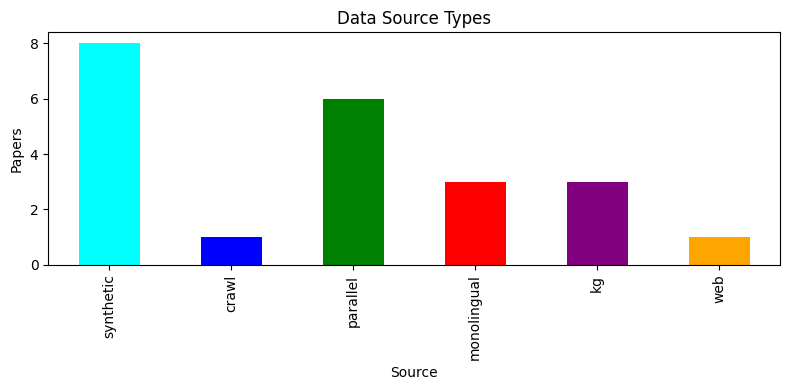

In [ ]:
src=["synthetic","translated","crawl","parallel","monolingual","kg","bitext","web"]
s=(df["Items / Scale (Source)"]+" "+df["Data Collection Process"]).str.lower()
cnt={k:s.str.contains(k).sum() for k in src if s.str.contains(k).sum()>0}
colors = ["cyan", "blue", "green", "red", "purple", "orange", "brown", "pink"] # Define a list of colors
pd.Series(cnt).plot.bar(figsize=(8,4), color=colors[:len(cnt)]) # Pass the list to color
plt.title("Data Source Types");plt.xlabel("Source");plt.ylabel("Papers")
plt.tight_layout();plt.savefig(f"{out_dir}/fig7_data_sources.png",dpi=300)
plt.show()

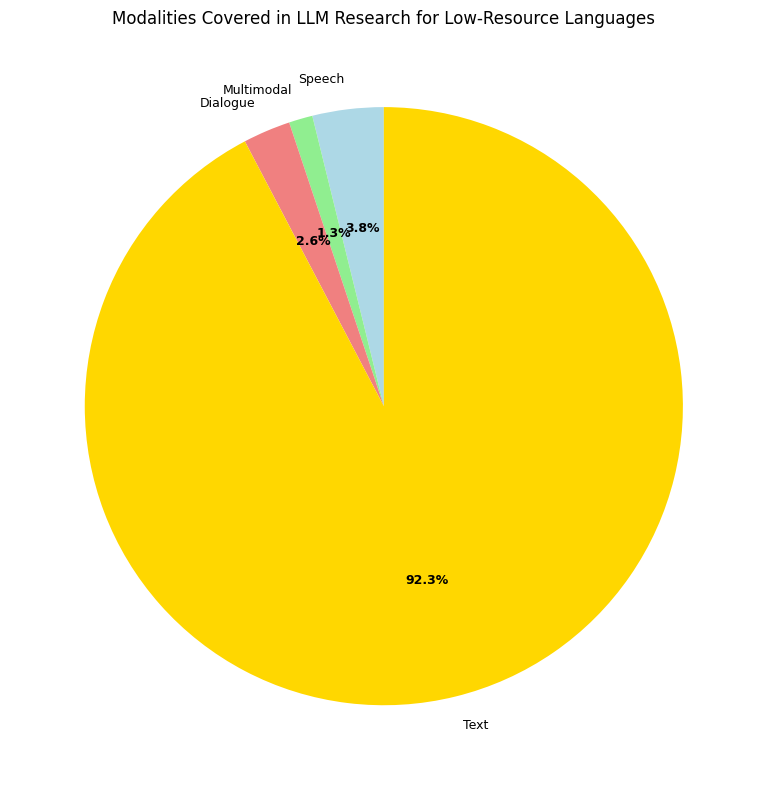

In [ ]:
import matplotlib.pyplot as plt

# Define modalities with clear, non-overlapping keywords
modes = {
    "Speech": ["speech", "asr", "tts", "audio", "voice"],
    "Multimodal": ["image", "vision", "video", "visual", "graphics"],
    "Dialogue": ["dialog", "chat", "conversation", "interactive", "turn"],
    "Text": ["text", "language", "nlp", "translation", "summarization", "classification"]
}

# Combine Title and Research Objectives
txt = (df["Title"] + " " + df["Research Objectives"]).str.lower()

# Count papers for each modality
cnt = {}
for modality, keywords in modes.items():
    # Use regex to match whole words (optional, but more precise)
    pattern = "|".join(rf"\b{kw}\b" for kw in keywords)
    cnt[modality] = txt.str.contains(pattern, case=False).sum()

# Convert to Series and plot as a pie chart
plt.figure(figsize=(8, 8))  # Larger figure size for better readability

# Define colors for the pie slices
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    cnt.values(),
    labels=cnt.keys(),
    autopct='%1.1f%%',  # Show percentage on slices
    startangle=90,      # Rotate the pie chart to start at 90 degrees
    colors=colors,
    textprops={'fontsize': 9}  # Adjust font size for labels
)

# Add emphasis to percentages (optional: bold font)
for autotext in autotexts:
    autotext.set_fontweight('bold')

# Add title
plt.title("Modalities Covered in LLM Research for Low-Resource Languages", fontsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig(f"{out_dir}/fig8_modalities_pie.png", dpi=300)
plt.show()

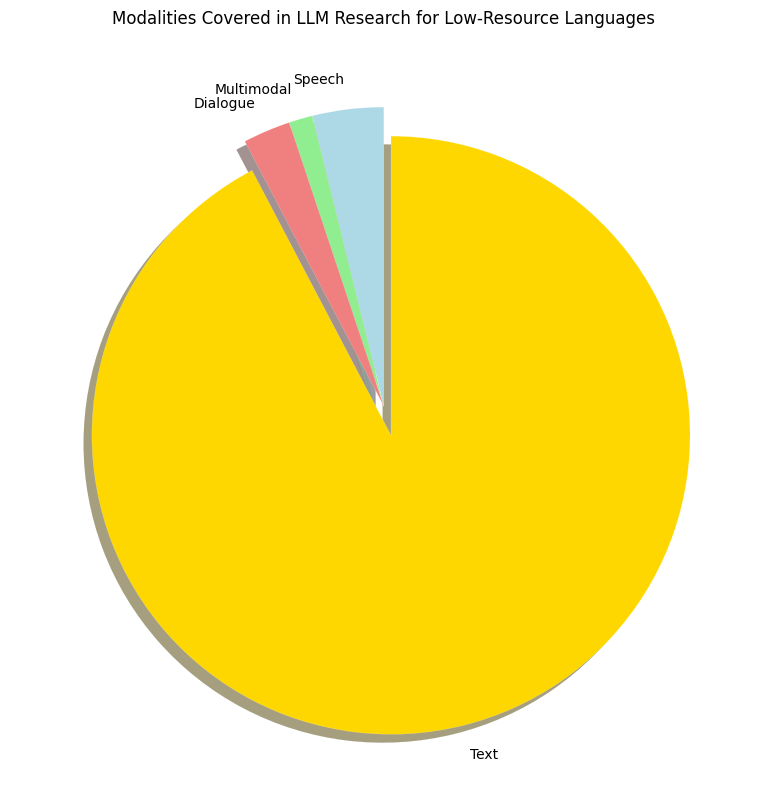

In [ ]:
import matplotlib.pyplot as plt

# Define modalities with clear, non-overlapping keywords
modes = {
    "Speech": ["speech", "asr", "tts", "audio", "voice"],
    "Multimodal": ["image", "vision", "video", "visual", "graphics"],
    "Dialogue": ["dialog", "chat", "conversation", "interactive", "turn"],
    "Text": ["text", "language", "nlp", "translation", "summarization", "classification"]
}

# Combine Title and Research Objectives
txt = (df["Title"] + " " + df["Research Objectives"]).str.lower()

# Count papers for each modality
cnt = {}
for modality, keywords in modes.items():
    # Use regex to match whole words (optional, but more precise)
    pattern = "|".join(rf"\b{kw}\b" for kw in keywords)
    cnt[modality] = txt.str.contains(pattern, case=False).sum()

# Convert to Series and plot as a pie chart
plt.figure(figsize=(8, 8))  # Larger figure size for better readability

# Define colors for the pie slices
colors = ['lightblue', 'lightgreen', 'lightcoral', 'gold']
explode = (0, 0, 0, 0.1)
# Plot pie chart WITHOUT autopct (this removes the percentages)
wedges, texts = plt.pie(
    cnt.values(),
    labels=cnt.keys(),
    startangle=90,      # Rotate the pie chart to start at 90 degrees
    colors=colors, shadow=True, explode = explode,   wedgeprops = {"linewidth": 0.1, "edgecolor": "white"},
    textprops={'fontsize': 10}  # Adjust font size for labels
)

# Add title
plt.title("Modalities Covered in LLM Research for Low-Resource Languages", fontsize=12)

# Save and show the plot
plt.tight_layout()
plt.savefig(f"{out_dir}/fig8_modalities_pie_no_percent.png", dpi=300)
plt.show()

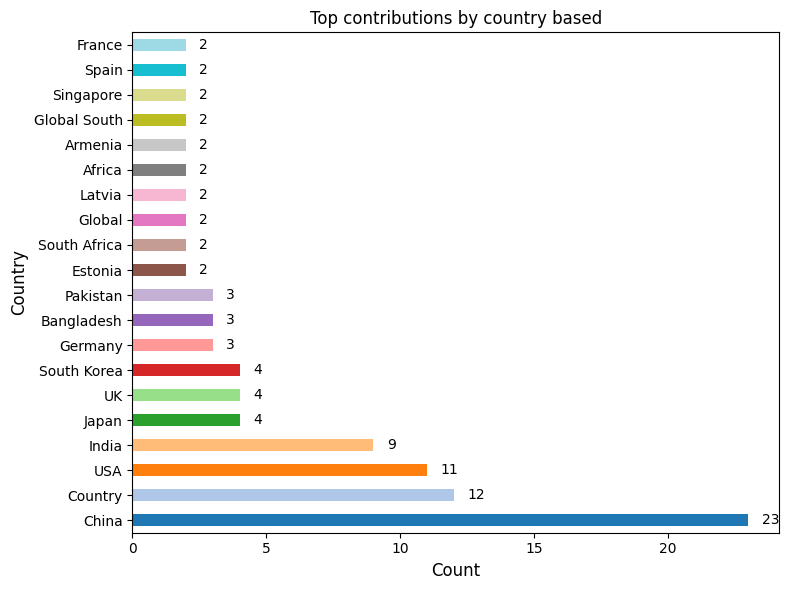

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract and count countries
countries = df["Country"].str.split(",").explode().str.strip()
top_countries = countries.value_counts().head(20)

# Define a colormap or list of colors
colors = plt.cm.tab20(range(len(top_countries)))  # Use tab20 colormap for distinct colors

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
top_countries.plot.barh(color=colors)
plt.title("Top contributions by country based", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Add value labels at the end of each bar
for i, v in enumerate(top_countries):
    plt.text(v + 0.5, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.savefig(f"{out_dir}/fig9_country.png", dpi=300)
plt.show()

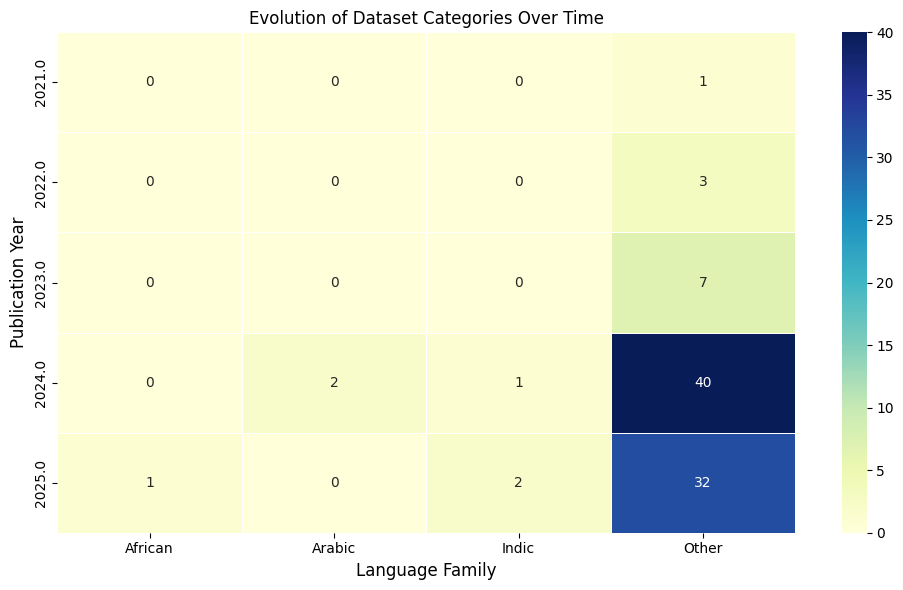

In [ ]:
import seaborn as sns
import pandas as pd

# Extract language family (simplified example)
def extract_language_family(txt):
    txt = str(txt).lower()
    if "indic" in txt:
        return "Indic"
    elif "turkic" in txt:
        return "Turkic"
    elif "slavic" in txt:
        return "Slavic"
    elif "arabic" in txt:
        return "Arabic"
    elif "african" in txt or "masakhane" in txt:
        return "African"
    else:
        return "Other"

# Filter and categorize
mask = df["Items / Scale (Source)"].str.contains("dataset|benchmark|corpus|bench", case=False, na=False)
d = df[mask & df["year"].notna()].copy()
d['language_family'] = d["Items / Scale (Source)"].apply(extract_language_family)

# Create pivot table
pivot = d.pivot_table(index='year', columns='language_family', aggfunc='size', fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, cmap="YlGnBu", fmt="d", linewidths=.5)
plt.title("Evolution of Dataset Categories Over Time", fontsize=12)
plt.xlabel("Language Family", fontsize=12)
plt.ylabel("Publication Year", fontsize=12)
plt.tight_layout()
plt.savefig(f"{out_dir}/fig10_benchmarks_heatmap.png", dpi=300)
plt.show()

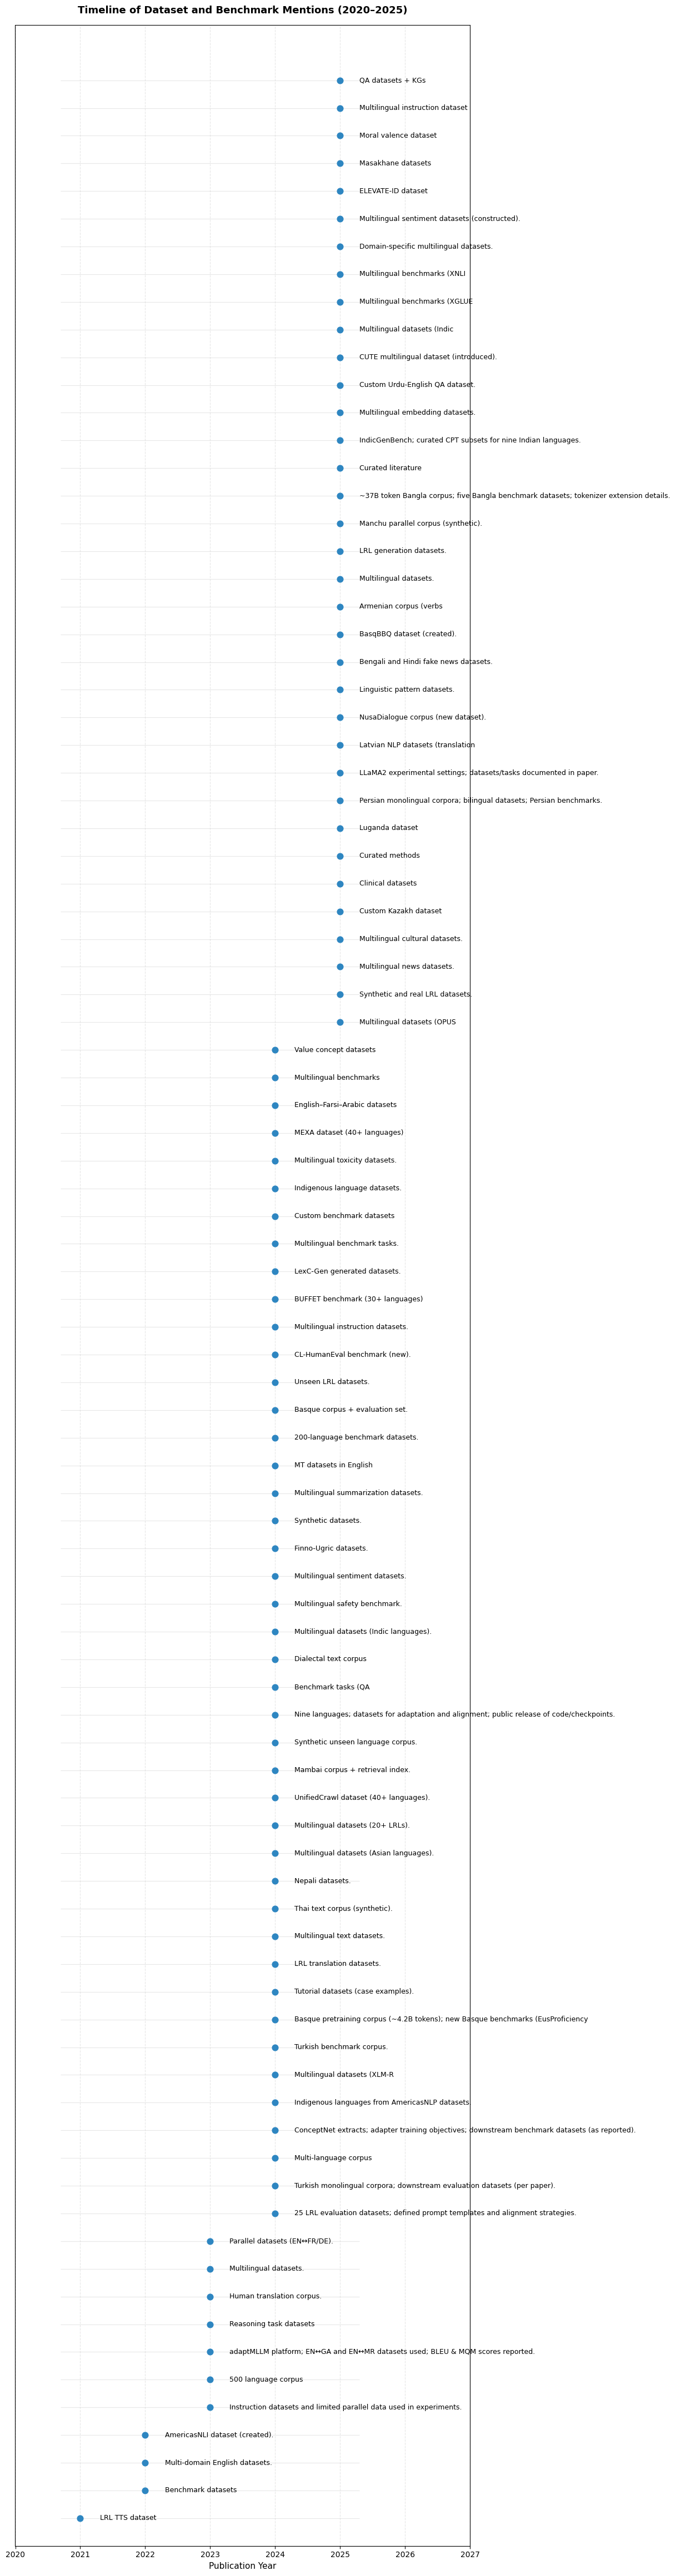

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Detect dataset / benchmark mentions
mask = df["Items / Scale (Source)"].str.contains("dataset|benchmark|corpus|bench", case=False, na=False)
d = df[mask & df["year"].notna()].copy()

if d.empty:
    print("No dataset or benchmark mentions detected.")
else:
    d = d.sort_values("year")
    # Assign vertical levels for layout
    levels = np.arange(len(d)) + 1  # each entry its own level
    fig, ax = plt.subplots(figsize=(12, 0.5 * len(d) + 2))

    # Draw horizontal timeline
    ax.hlines(levels, d["year"].min() - 0.3, d["year"].max() + 0.3, color="lightgray", linewidth=0.8, alpha=0.5)

    # Plot markers by year
    ax.scatter(d["year"], levels, color="#2E86C1", s=60, zorder=3)

    # Add text labels to the right of points
    for y, lvl, txt in zip(d["year"], levels, d["Items / Scale (Source)"]):
        label = str(txt).split(",")[0].strip()
        ax.text(y + 0.3, lvl, label, va="center", fontsize=9, color="black")

    # Formatting
    ax.set_yticks([])
    ax.set_xlabel("Publication Year", fontsize=11)
    ax.set_xlim(d["year"].min() - 1, d["year"].max() + 2)
    ax.set_ylim(0, len(d) + 2)
    ax.set_title("Timeline of Dataset and Benchmark Mentions (2020–2025)", fontsize=13, weight="bold", pad=15)
    ax.grid(axis="x", linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"{out_dir}/fig10_benchmarks_timeline_readable.png", dpi=400)
    plt.show()


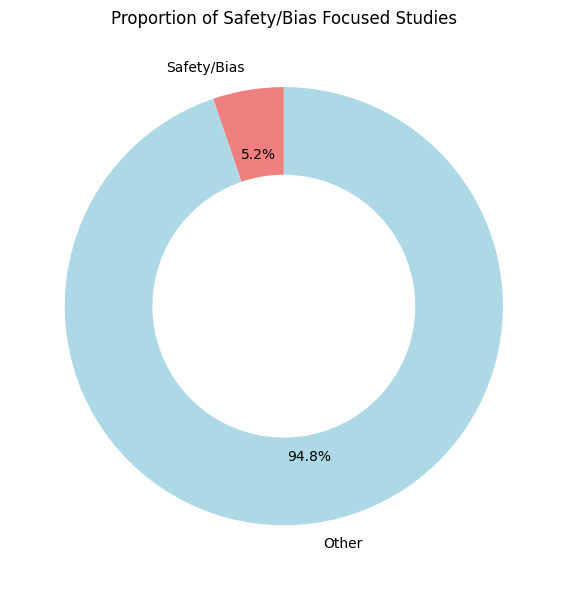

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Detect papers focusing on safety/bias
s = df["Findings"].str.contains("bias|toxicity|safety|hallucinat|detox", case=False, na=False)

# Count papers in each category
counts = pd.Series({"Safety/Bias": s.sum(), "Other": len(df) - s.sum()})

# Define colors
colors = ['lightcoral', 'lightblue']

# Create figure
plt.figure(figsize=(6, 6))

# Plot donut chart
wedges, texts, autotexts = plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4},
    textprops={'fontsize': 10}
)

# --- Custom function to center text ---
def center_text(wedges, autotexts):
    for i, (wedge, autotext) in enumerate(zip(wedges, autotexts)):
        # Get the center of the wedge
        angle = (wedge.theta2 + wedge.theta1) / 2.
        x = np.cos(np.deg2rad(angle))
        y = np.sin(np.deg2rad(angle))

        # Place text at the center of the wedge
        autotext.set_position((x * 0.7, y * 0.7))  # Adjust 0.7 for distance from center
        autotext.set_horizontalalignment('center')
        autotext.set_verticalalignment('center')

# Apply custom centering
center_text(wedges, autotexts)

# Styling
plt.title("Proportion of Safety/Bias Focused Studies", fontsize=12)
plt.ylabel("")  # Remove y-axis label
plt.tight_layout()
plt.savefig(f"{out_dir}/fig11_safety_donut_centered.png", dpi=300)
plt.show()

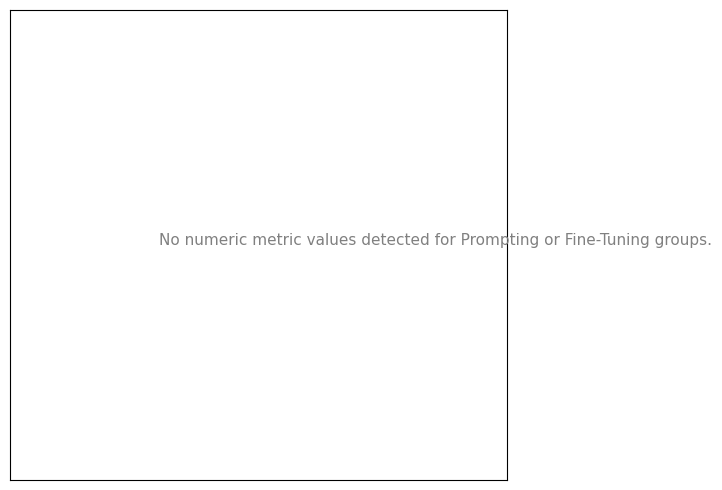

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Classify papers ---
def classify_group(text):
    s = str(text).lower()
    if "prompt" in s or "icl" in s or "in-context" in s:
        return "Prompting / ICL"
    elif "fine" in s or "adapter" in s or "lora" in s or "peft" in s:
        return "Fine-tuning / PEFT"
    else:
        return None

df["group"] = df["Theories / Models"].apply(classify_group)

# --- Extract numeric metrics (any numbers in Findings) ---
df["metric"] = pd.to_numeric(
    df["Findings"].str.extract(r"(\d+\.?\d*)")[0], errors="coerce"
)

# --- Filter valid entries ---
d = df.dropna(subset=["group", "metric"]).copy()

plt.figure(figsize=(7,5))

if not d.empty:
    d.boxplot(column="metric", by="group", grid=False, patch_artist=True,
              boxprops=dict(facecolor="#AED6F1", color="black"),
              medianprops=dict(color="red", linewidth=1.5))
    plt.title("Prompting vs Fine-Tuning Reported Metrics", fontsize=13, weight="bold")
    plt.suptitle("")
    plt.xlabel("Method Group")
    plt.ylabel("Reported Metric Value (Heuristic)")
    plt.xticks(rotation=10)

    # Show sample sizes above each box
    counts = d["group"].value_counts()
    for i, grp in enumerate(counts.index, start=1):
        plt.text(i, d.loc[d["group"]==grp,"metric"].max()*1.02,
                 f"n={counts[grp]}", ha="center", fontsize=9, color="gray")
else:
    plt.text(0.3, 0.5,
             "No numeric metric values detected for Prompting or Fine-Tuning groups.",
             fontsize=11, color="gray")
    plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.savefig(f"{out_dir}/fig12_prompt_box_fixed.png", dpi=400)
plt.show()



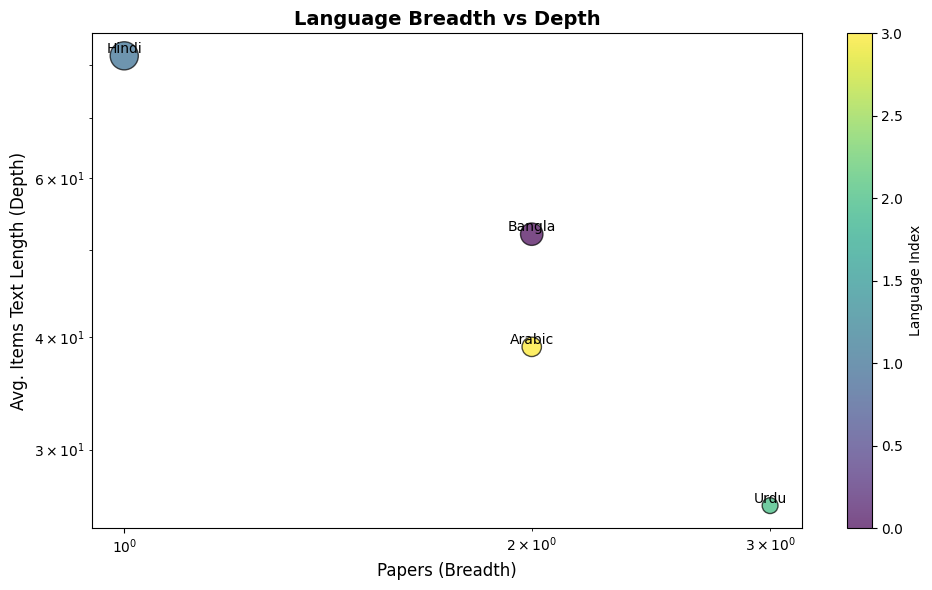

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Collect stats for each language
langs = ["Bangla", "Hindi", "Urdu", "Swahili", "Hausa", "Tamil", "Arabic"]
stat = []
for l in langs:
    m = (df["Title"] + df["Research Objectives"]).str.contains(l, case=False)
    if m.sum() > 0:
        # Calculate average text length for matching rows
        avg_text_length = df.loc[m, "Items / Scale (Source)"].str.len().mean()
        stat.append((l, m.sum(), avg_text_length))

# Extract data for plotting
x = [s[1] for s in stat]  # Number of papers
y = [s[2] for s in stat]  # Average text length
sizes = [v * 5 for v in y]  # Bubble size proportional to average text length

# Plot bubble chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x, y, s=sizes, alpha=0.7, edgecolor='black', c=np.arange(len(stat)), cmap='viridis')

# Add labels for languages
for i, (l, a, b) in enumerate(stat):
    plt.text(a, b, l, ha='center', va='bottom', fontsize=10)

# Styling
plt.xscale('log')  # Logarithmic scale for papers (breadth)
plt.yscale('log')  # Logarithmic scale for text length (depth)
plt.colorbar(scatter, label="Language Index")
plt.xlabel("Papers (Breadth)", fontsize=12)
plt.ylabel("Avg. Items Text Length (Depth)", fontsize=12)
plt.title("Language Breadth vs Depth", fontsize=14, fontweight='bold')
plt.grid(False)
plt.tight_layout()
plt.savefig(f"{out_dir}/fig13_bubble_log.png", dpi=300)
plt.show()

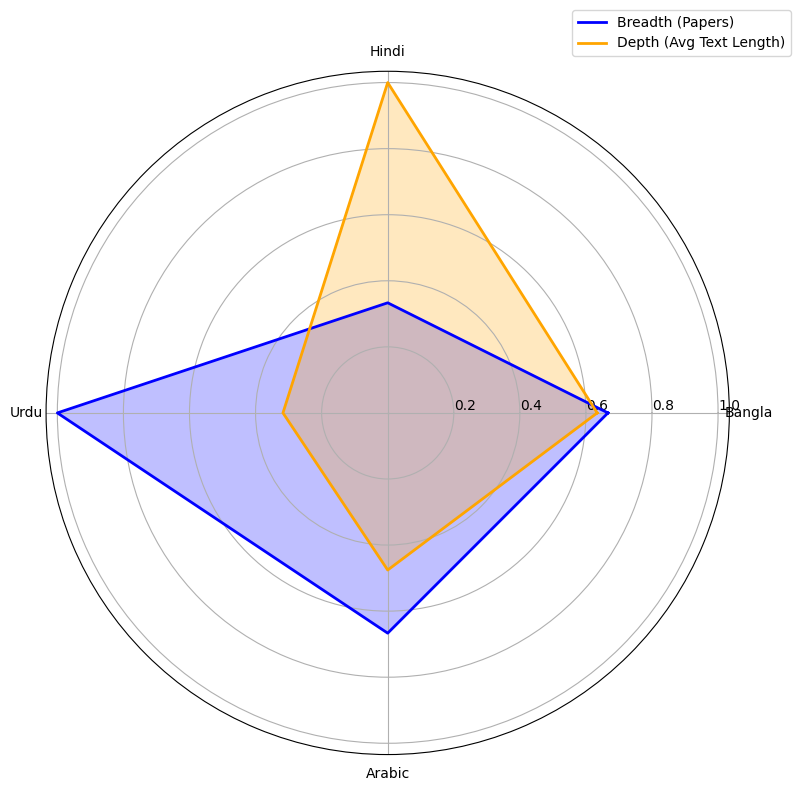

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- collect stats for each language ---
langs = ["Bangla", "Hindi", "Urdu", "Swahili", "Hausa", "Tamil", "Arabic"]
stat = []
for l in langs:
    m = (df["Title"] + df["Research Objectives"]).str.contains(l, case=False, na=False)
    if m.sum() > 0:
        stat.append((l, m.sum(), df.loc[m, "Items / Scale (Source)"].astype(str).str.len().mean()))

if not stat:
    print("No matching languages found in dataset.")
else:
    languages = [s[0] for s in stat]
    papers = np.array([s[1] for s in stat], dtype=float)
    avg_len = np.array([s[2] for s in stat], dtype=float)

    # Normalize
    papers_norm = papers / papers.max() if papers.max() > 0 else papers
    avg_len_norm = avg_len / avg_len.max() if avg_len.max() > 0 else avg_len

    # --- build closed loop arrays ---
    num_vars = len(languages)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))           # close loop
    papers_norm = np.concatenate((papers_norm, [papers_norm[0]]))
    avg_len_norm = np.concatenate((avg_len_norm, [avg_len_norm[0]]))

    # --- plot ---
    fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))
    ax.plot(angles, papers_norm, color="blue", linewidth=2, label="Breadth (Papers)")
    ax.fill(angles, papers_norm, color="blue", alpha=0.25)
    ax.plot(angles, avg_len_norm, color="orange", linewidth=2, label="Depth (Avg Text Length)")
    ax.fill(angles, avg_len_norm, color="orange", alpha=0.25)

    # axis labels
    ax.set_thetagrids(np.degrees(angles[:-1]), languages, fontsize=10)
    ax.set_rlabel_position(0)

    ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))
    plt.tight_layout()
    plt.savefig(f"{out_dir}/fig13_radar_final.png", dpi=400)
    plt.show()




<Figure size 700x500 with 0 Axes>

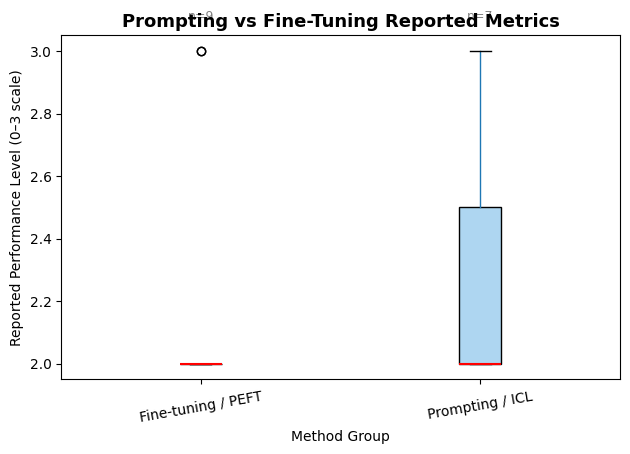

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- classify papers ---
def classify_group(text):
    s = str(text).lower()
    if "prompt" in s or "icl" in s or "in-context" in s:
        return "Prompting / ICL"
    elif "fine" in s or "adapter" in s or "lora" in s or "peft" in s:
        return "Fine-tuning / PEFT"
    else:
        return None

df["group"] = df["Theories / Models"].apply(classify_group)

# --- extract numeric metrics or assign proxy from qualitative text ---
def extract_metric(s):
    s = str(s).lower()
    # numeric extraction
    num = pd.to_numeric(pd.Series(s).str.extract(r"(\d+\.?\d*)")[0], errors="coerce").iloc[0]
    if pd.notna(num):
        return num
    # qualitative fallback mapping
    if any(k in s for k in ["significant","high","large","strong","substantial","major"]):
        return 3.0
    elif any(k in s for k in ["improve","better","outperform","increase","higher","gain"]):
        return 2.0
    elif any(k in s for k in ["slight","marginal","minor","small"]):
        return 1.0
    elif any(k in s for k in ["no","not","little","less","none","failed"]):
        return 0.5
    else:
        return np.nan

df["metric"] = df["Findings"].apply(extract_metric)

# --- filter valid entries ---
d = df.dropna(subset=["group", "metric"]).copy()

plt.figure(figsize=(7,5))

if not d.empty:
    d.boxplot(column="metric", by="group", grid=False, patch_artist=True,
              boxprops=dict(facecolor="#AED6F1", color="black"),
              medianprops=dict(color="red", linewidth=1.5))
    plt.title("Prompting vs Fine-Tuning Reported Metrics", fontsize=13, weight="bold")
    plt.suptitle("")
    plt.xlabel("Method Group")
    plt.ylabel("Reported Performance Level (0–3 scale)")
    plt.xticks(rotation=10)

    # Show sample sizes above each box
    counts = d["group"].value_counts()
    for i, grp in enumerate(counts.index, start=1):
        ymax = d.loc[d["group"]==grp, "metric"].max()
        plt.text(i, ymax + 0.1, f"n={counts[grp]}", ha="center", fontsize=9, color="gray")
else:
    plt.text(0.25, 0.5, "No entries found for Prompting or Fine-Tuning groups",
             fontsize=11, color="gray")
    plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.savefig(f"{out_dir}/fig12_prompt_box_final.png", dpi=400)
plt.show()


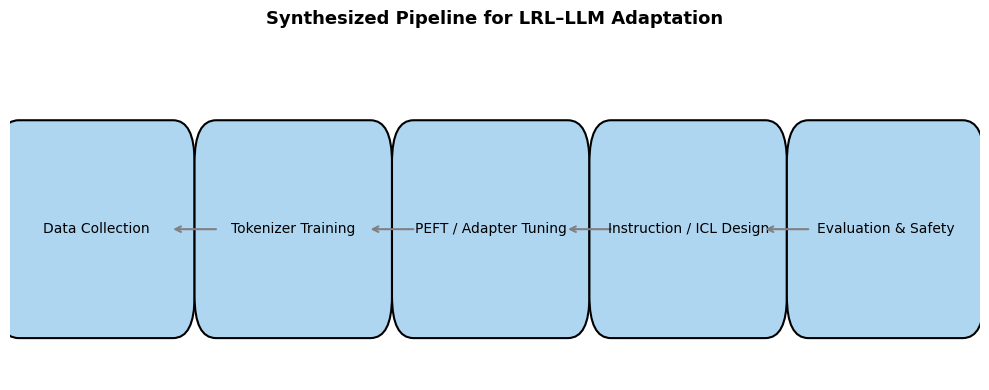

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as p

# --- create figure and axis ---
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis("off")

# --- pipeline steps (reversed for left-to-right flow) ---
steps = ["Data Collection", "Tokenizer Training", "PEFT / Adapter Tuning", "Instruction / ICL Design", "Evaluation & Safety"]
x = [0.5, 2.8, 5.1, 7.4, 9.7]

# --- draw rounded boxes and arrows ---
for i, s in enumerate(steps):
    # Draw rounded box
    rect = p.FancyBboxPatch(
        (x[i] - 0.9, 1.5), 1.8, 0.8,
        boxstyle="round,pad=0.25",
        facecolor="#AED6F1", edgecolor="black", linewidth=1.5
    )
    ax.add_patch(rect)

    # Add text inside the box
    ax.text(x[i], 1.9, s, ha="center", va="center", fontsize=10, fontweight="medium", wrap=True)

    # Draw connecting arrows (from left to right)
    if i < len(steps) - 1:
        ax.annotate("",
                    xy=(x[i] + 0.9, 1.9),
                    xytext=(x[i + 1] - 0.9, 1.9),
                    arrowprops=dict(arrowstyle="->", lw=1.5, color="gray", shrinkA=0, shrinkB=0))

# --- title and layout ---
plt.title("Synthesized Pipeline for LRL–LLM Adaptation", fontsize=13, weight="bold", pad=15)
plt.xlim(-0.5, 10.8)
plt.ylim(1, 3)
plt.tight_layout()

# --- save and display ---
plt.savefig(f"{out_dir}/fig14_pipeline_final.png", dpi=400, bbox_inches="tight")
plt.show()